<a href="https://colab.research.google.com/github/Lomesh2000/kmeans-clustering----customer-segmentation/blob/Lomesh2000/cluster_1_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


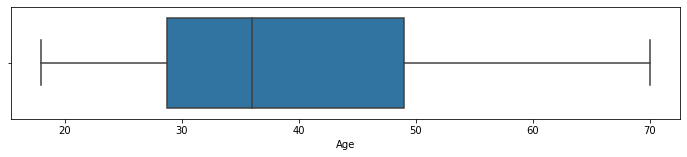

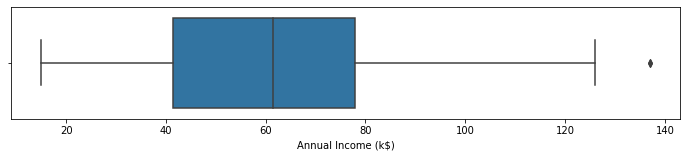

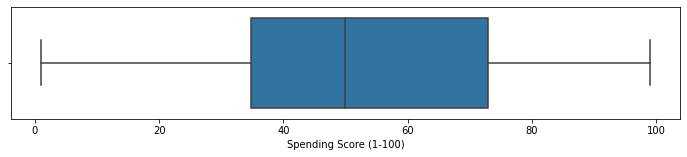

In [ ]:
L=['Age','Annual Income (k$)','Spending Score (1-100)']
for i in range(len(L)):
  plt.figure(figsize=(12,7))
  plt.subplot(3,1,i+1)
  sns.boxplot(data[L[i]])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe(percentiles=[0.95])

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
50%,100.500000,36.000000,61.500000,50.000000
95%,190.050000,66.050000,103.000000,92.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
q1=data['Annual Income (k$)'].quantile(0.25)

In [ ]:
q2=data['Annual Income (k$)'].quantile(0.75)

In [ ]:
IQR=q2-q1
IQR


36.5

In [ ]:
lower_limit=q1-1.5*IQR
upper_limit=q2+1.5*IQR
lower_limit

-13.25

In [ ]:
lower_limit=min(data['Annual Income (k$)'])

In [ ]:
for i in data['Annual Income (k$)']:
  if i>upper_limit:
    i=upper_limit
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


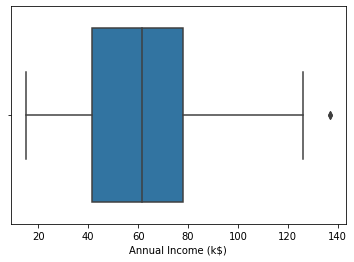

In [ ]:
sns.boxplot(data['Annual Income (k$)'])

In [ ]:
upper_limit

132.75

In [ ]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [ ]:
data['Annual Income (k$)']=np.where(data['Annual Income (k$)']>upper_limit,upper_limit,data['Annual Income (k$)'])   

In [ ]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.517500
std       26.143551
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      132.750000
Name: Annual Income (k$), dtype: float64

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

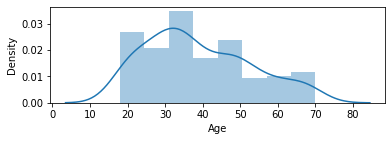

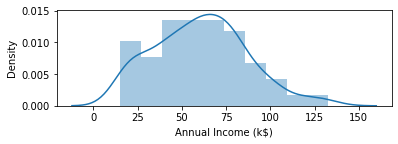

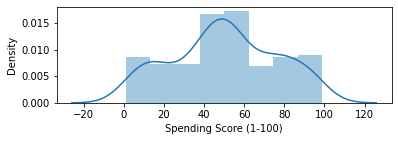

In [ ]:
for i in range(len(L)):
  plt.figure(figsize=(6,6))
  plt.subplot(3,1,i+1)
  sns.distplot(data[L[i]])

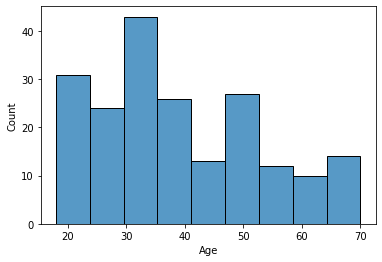

In [ ]:
sns.histplot(x='Age',data=data)

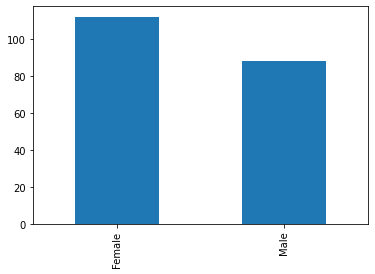

In [ ]:
data['Gender'].value_counts().plot(kind='bar')

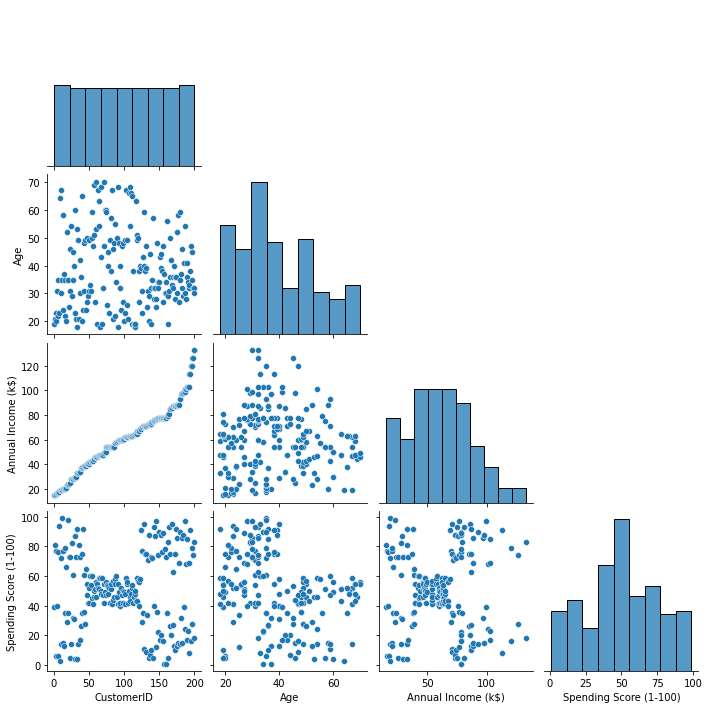

In [ ]:
sns.pairplot(data,corner=True)

In [ ]:
data.iloc[:,3]

0       15.00
1       15.00
2       16.00
3       16.00
4       17.00
        ...  
195    120.00
196    126.00
197    126.00
198    132.75
199    132.75
Name: Annual Income (k$), Length: 200, dtype: float64

In [ ]:
k=data.iloc[:,[3,4]].values
k

array([[ 15.  ,  39.  ],
       [ 15.  ,  81.  ],
       [ 16.  ,   6.  ],
       [ 16.  ,  77.  ],
       [ 17.  ,  40.  ],
       [ 17.  ,  76.  ],
       [ 18.  ,   6.  ],
       [ 18.  ,  94.  ],
       [ 19.  ,   3.  ],
       [ 19.  ,  72.  ],
       [ 19.  ,  14.  ],
       [ 19.  ,  99.  ],
       [ 20.  ,  15.  ],
       [ 20.  ,  77.  ],
       [ 20.  ,  13.  ],
       [ 20.  ,  79.  ],
       [ 21.  ,  35.  ],
       [ 21.  ,  66.  ],
       [ 23.  ,  29.  ],
       [ 23.  ,  98.  ],
       [ 24.  ,  35.  ],
       [ 24.  ,  73.  ],
       [ 25.  ,   5.  ],
       [ 25.  ,  73.  ],
       [ 28.  ,  14.  ],
       [ 28.  ,  82.  ],
       [ 28.  ,  32.  ],
       [ 28.  ,  61.  ],
       [ 29.  ,  31.  ],
       [ 29.  ,  87.  ],
       [ 30.  ,   4.  ],
       [ 30.  ,  73.  ],
       [ 33.  ,   4.  ],
       [ 33.  ,  92.  ],
       [ 33.  ,  14.  ],
       [ 33.  ,  81.  ],
       [ 34.  ,  17.  ],
       [ 34.  ,  73.  ],
       [ 37.  ,  26.  ],
       [ 37.  ,  75.  ],


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,random_state=42,init='k-means++')
  Kmeans.fit(k)
  inertia.append(Kmeans.inertia_)

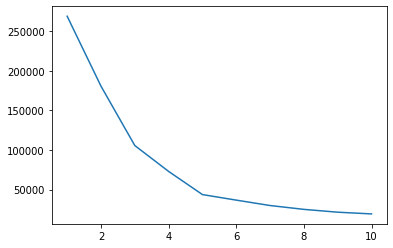

In [ ]:
plt.plot(range(1,11),inertia)

In [ ]:
inertia

[268717.56375000003,
 180456.9539366883,
 105529.6365152151,
 72861.05249259225,
 43639.878158556414,
 36640.0775425058,
 29829.06647116095,
 24964.620758679725,
 21405.83744167654,
 19233.09769600554]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans.fit(k)
Y=kmeans.predict(k)
Y

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [ ]:
k[Y==0]

array([[ 70.  ,  29.  ],
       [ 71.  ,  35.  ],
       [ 71.  ,  11.  ],
       [ 71.  ,   9.  ],
       [ 72.  ,  34.  ],
       [ 73.  ,   5.  ],
       [ 73.  ,   7.  ],
       [ 74.  ,  10.  ],
       [ 75.  ,   5.  ],
       [ 76.  ,  40.  ],
       [ 77.  ,  12.  ],
       [ 77.  ,  36.  ],
       [ 78.  ,  22.  ],
       [ 78.  ,  17.  ],
       [ 78.  ,  20.  ],
       [ 78.  ,  16.  ],
       [ 78.  ,   1.  ],
       [ 78.  ,   1.  ],
       [ 79.  ,  35.  ],
       [ 81.  ,   5.  ],
       [ 85.  ,  26.  ],
       [ 86.  ,  20.  ],
       [ 87.  ,  27.  ],
       [ 87.  ,  13.  ],
       [ 87.  ,  10.  ],
       [ 88.  ,  13.  ],
       [ 88.  ,  15.  ],
       [ 93.  ,  14.  ],
       [ 97.  ,  32.  ],
       [ 98.  ,  15.  ],
       [ 99.  ,  39.  ],
       [101.  ,  24.  ],
       [103.  ,  17.  ],
       [103.  ,  23.  ],
       [113.  ,   8.  ],
       [120.  ,  16.  ],
       [126.  ,  28.  ],
       [132.75,  18.  ]])

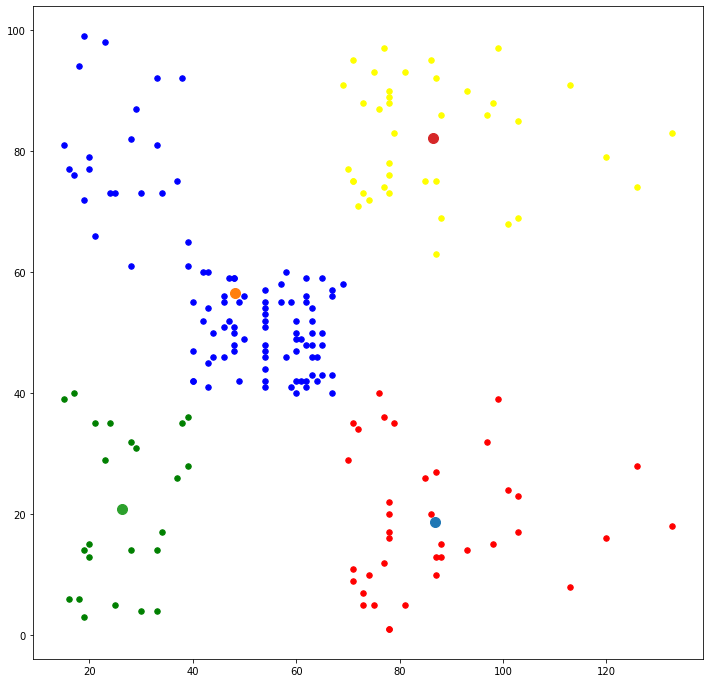

In [ ]:
plt.figure(figsize=(12,12))

plt.scatter(k[Y==0,0],k[Y==0,1],s=30,c='red',label='Cluster1')
plt.scatter(k[Y==1,0],k[Y==1,1],s=30,c='blue',label='Cluster2')
plt.scatter(k[Y==2,0],k[Y==2,1],s=30,c='green',label='Cluster3')
plt.scatter(k[Y==3,0],k[Y==3,1],s=30,c='yellow',label='Cluster4')

for i in range(4):
  plt.scatter(np.mean(k[Y==i,0]),np.mean(k[Y==i,1]),s=100)

In [ ]:
kmeans_5=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans_5.fit(k)
Y=kmeans_5.predict(k)
Y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

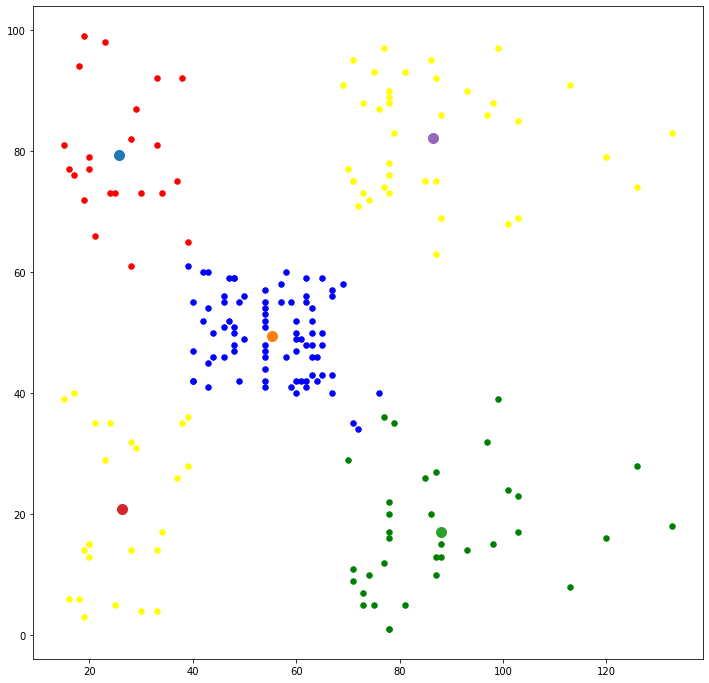

In [ ]:
plt.figure(figsize=(12,12))

plt.scatter(k[Y==0,0],k[Y==0,1],s=30,c='red',label='Cluster1')
plt.scatter(k[Y==1,0],k[Y==1,1],s=30,c='blue',label='Cluster2')
plt.scatter(k[Y==2,0],k[Y==2,1],s=30,c='green',label='Cluster3')
plt.scatter(k[Y==3,0],k[Y==3,1],s=30,c='yellow',label='Cluster4')
plt.scatter(k[Y==4,0],k[Y==4,1],s=30,c='yellow',label='Cluster5')
for i in range(5):
  plt.scatter(np.mean(k[Y==i,0]),np.mean(k[Y==i,1]),s=100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')